In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset\COVID-19-time-series-clean-complete.csv')
data = data.rename(columns={"Country/Region": "country"})
data.head(10)


,Unnamed: 0,Date,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
5,5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0,0,0
6,6,2020-01-22,Argentina,0,0,0.0,0.0,0,0,0
7,7,2020-01-22,Armenia,0,0,0.0,0.0,0,0,0
8,8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
9,9,2020-01-22,Austria,0,0,0.0,0.0,0,0,0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

data['yearmonth'] = data['Date'].map(lambda date: 100*date.year+date.month)

data

,Unnamed: 0,Date,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,yearmonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108


In [5]:
data_fourth =data.query('yearmonth==202004')

data_fourth

,Unnamed: 0,Date,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,yearmonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
19296,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
19297,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
19298,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [6]:
covid = data_fourth.groupby(['country'])['New cases'].sum().reset_index()
covid

,country,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
...,...,...
188,Vietnam,58
189,West Bank and Gaza,225
190,Yemen,6
191,Zambia,71


In [7]:
total = covid.sort_values(by=['New cases','country'])

total.tail(8)

,country,New cases
65,Germany,91201
84,Italy,99671
142,Russia,104161
178,Turkey,106673
162,Spain,127546
183,United Kingdom,139956
61,France,140313
179,US,888804


c:\Users\FrsCo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


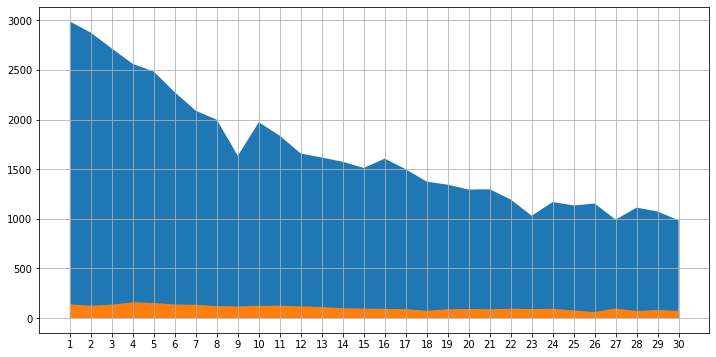

In [8]:
iran_info = data.query("yearmonth == 202004 and country == 'Iran'")

iran_info['day'] = iran_info['Date'].map(lambda date: date.day)

plt.figure(figsize=(12,6))
plt.grid()
plt.fill_between(iran_info['day'].to_numpy(dtype=str),iran_info['New cases'],label='Cases')
plt.fill_between(iran_info['day'].to_numpy(dtype=str),iran_info['New deaths'])
plt.show()